In [ ]:
#### some good resources 
#### https://www.enjoyalgorithms.com/blog/topic-modelling-using-lda-lsa 

In [6]:
!python -m pip install scipy==1.12

  Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 38.7 MB/s  0:00:01 eta 0:00:01
Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy━━━━━━━━━━━━━━━━━━━ 0/2 [numpy]
    Found existing installation: scipy 1.13.1 0/2 [numpy]
    Uninstalling scipy-1.13.1:0m╺━━━━━━━━━━━━━━━━━━━ 1/2 [scipy]
      Successfully uninstalled scipy-1.13.1━━━━━━━━━━━━━━━━━━━ 1/2 [scipy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scipy]32m1/2 [scipy]


In [9]:
!python -m pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nltk]3/4 [nltk]]


In [15]:
!python -m pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [4]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.3
    Uninstalling pip-25.3:
      Successfully uninstalled pip-25.3


In [5]:
!python -m pip install matplotlib

In [3]:
!python -m pip install matplotlib-inline

  Using cached matplotlib_inline-0.2.1-py3-none-any.whl.metadata (2.3 kB)
Using cached matplotlib_inline-0.2.1-py3-none-any.whl (9.5 kB)


In [19]:
!python -m pip install umap

ERROR: Could not find a version that satisfies the requirement umap (from versions: none)
ERROR: No matching distribution found for umap


In [89]:
!python -m pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 34.8 MB/s  0:00:00m0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.41-cp39-cp39-macosx_10_9_x86_64.whl size=689252 sha256=50d8364fd42758f141f3f931f7738debf66d2b7cbb30af68a12fa1b48da484ab
  Stored in directory: /Users/tylerhinnendael/Library/Caches/pip/wheels/8a/25/ef/ea295bd6ff503043606cbf608f923aaa71b232730dfbef019a
Successfully built hdbscan


In [124]:
!python -m pip install seaborn 

In [150]:
!python -m pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.1 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


In [156]:
!python -m pip install nbformat==4.2.0

  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata (755 bytes)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
Using cached attrs-25.4.0-py3-none-any.whl (67 kB)
Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [nbformat]6/7 [nbformat]ng]


In [8]:
!python -m pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.7/32.7 MB 50.0 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17/17 [datasets]/17 [datasets]ess]


In [4]:
!python -m pip install sentence_transformers

  Using cached torch-2.2.2-cp39-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 48.2 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 6.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.3 MB/s  0:00:00
Using cached torch-2.2.2-cp39-none-macosx_10_9_x86_64.whl (150.8 MB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.8 MB/s  0:00:00
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18/18 [sentence_transformers]ence_transformers]


In [15]:
!python -m pip install xformers==0.0.31

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.8 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × installing build dependencies for xformers did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
        Using cached setuptools-82.0.0-py3-none-any.whl.metadata (6.6 kB)
      ERROR: Could not find a version that satisfies the requirement torch>=2.7 (from versions: 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2)
      ERROR: No matching distribution found for torch>=2.7
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
ERROR: Failed to build 'xformers' when installing build dependencies for xformers


In [ ]:
!python -m pip install torch==2.10 ###  need to upgrade from python 3.9 to use torch and therefore sentence transformers embeddings

ERROR: Could not find a version that satisfies the requirement torch==2.10 (from versions: 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2)
ERROR: No matching distribution found for torch==2.10


In [14]:
import sys
sys.version

'3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]'

In [30]:
!python -m pip install nbformat==5.1.3

  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [205]:
!python -m pip install Dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [Dash]5/6 [Dash]


In [170]:
!python -m pip install networkx

In [31]:
import nbformat

In [157]:
pip list

Package                   Version
------------------------- -----------
appnope                   0.1.4
asttokens                 3.0.1
attrs                     25.4.0
click                     8.1.8
comm                      0.2.3
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.20
decorator                 5.2.1
et_xmlfile                2.0.0
exceptiongroup            1.3.1
executing                 2.2.1
fonttools                 4.60.2
funcy                     2.0
gensim                    3.4.0
hdbscan                   0.8.41
importlib_metadata        8.7.1
importlib_resources       6.5.2
ipykernel                 6.31.0
ipython                   8.18.1
ipython-genutils          0.2.0
jedi                      0.19.2
Jinja2                    3.1.6
joblib                    1.5.3
jsonschema                4.25.1
jsonschema-specifications 2025.9.1
jupyter_client            8.6.3
jupyter_core              5.8.1
kiwisolver            

### Import dependencies and data

#### Dependencies

In [392]:
import warnings
warnings.filterwarnings("ignore")
import sys
import os
#import numpy as np
import pandas as pd
import re
from importlib import reload
import openpyxl

import nltk
from nltk.corpus import stopwords

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim, logging, warnings
from gensim.utils import lemmatize, simple_preprocess
import pyLDAvis.gensim
import hdbscan

from sklearn.manifold import TSNE
import umap

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

from datasets import load_dataset

#from importlib import reload
import numpy as np
import tqdm

In [2]:
# dir_root deleted for privacy 
dir_root = os.getcwd() 
dir_modules = dir_root + '/topic_modeling/'
dir_data = dir_root + '/data/'
dir_models = dir_root + '/models/'
dir_viz = dir_root + '/visualizations/'

In [398]:
os.chdir(dir_modules)
import topic_modeling_LDA as lda;

### Datasets

#### Small dataset - works okay with probabilitic approach

- 100 records

In [396]:
os.chdir(dir_data)
train_small = pd.read_excel('lda_train_data.xlsx').drop(columns = 'Unnamed: 0')

corpus_list_small = list(train['train_raw'])
len(corpus_list)

99

In [397]:
# some implementations name 'train_dictionary' as 'id2word', but to me that's not very clear
train_data_small, train_corpus_data_small, train_corpus_small, train_dictionary_small = lda.automate_corpus_prep(train, 'train_raw')

preprocessed...
tokenized...
dictionary and corpus created


In [408]:
train_corpus_data_small

,train_raw,corpus_clean,tokens
0,Energy efficiency reduces costs and emissions.,energy efficiency reduces costs and emissions,"[energy, efficiency, reduces, costs, emissions]"
1,Renewable energy supports a cleaner grid.,renewable energy supports a cleaner grid,"[renewable, energy, supports, cleaner, grid]"
2,Energy storage stabilizes power supply.,energy storage stabilizes power supply,"[energy, storage, stabilizes, power, supply]"
3,Smart grids optimize energy distribution.,smart grids optimize energy distribution,"[smart, grids, optimize, energy, distribution]"
4,Energy audits identify savings opportunities.,energy audits identify savings opportunities,"[energy, audits, identify, savings, opportunit..."
...,...,...,...
94,Energy data enables informed insights.,energy data enables informed insights,"[energy, data, enables, informed, insights]"
95,Clean power improves public health.,clean power improves public health,"[clean, power, improves, public, health]"
96,Finance collaboration drives economic growth.,finance collaboration drives economic growth,"[finance, collaboration, drives, economic, gro..."
97,Education policy guides systems.,education policy guides systems,"[education, policy, guides, systems]"


#### Large corpus for running clustering approaches

- 2000 records

In [400]:
data_large = load_dataset("maartengr/arxiv_nlp")["train"]

# Extract metadata
abstracts = data_large["Abstracts"][:2000]
titles = data_large["Titles"][:2000]
len(abstracts)

2000

# Statistical (Probabilistic) Approach

#### Training data for base LDA model

- synthetic training developed by adding ChatGPT to write 100 sentences with 3 different categories (unlabeled)

In [8]:
os.chdir(dir_data)
train = pd.read_excel('lda_train_data.xlsx').drop(columns = 'Unnamed: 0')

corpus_list = list(train['train_raw'])
len(corpus_list)

99

In [9]:
train.head()

,train_raw
0,Energy efficiency reduces costs and emissions.
1,Renewable energy supports a cleaner grid.
2,Energy storage stabilizes power supply.
3,Smart grids optimize energy distribution.
4,Energy audits identify savings opportunities.


## Unsupervised topic modeling - Latent Dirichlet Allocation (LDA)

LDA is a probabilistic unsupervised modeling technique. It will provide the most probable topic. 
I designed functions to assign the most probable word for each topic as well, out of a list of n_top_words.

Resource: 

### Prepare the training data

regardless of training or inferencing

- Preprocess
- tokenize
- skip lemmatization (needs to be added)
- create dictionary and corpus

In [ ]:
# Note - depending on the complexity of the training and inference data, preprocesing will need to be a lot more robust.
# this is a simple example with little cleaning needed.

In [7]:
# some implementations name 'train_dictionary' as 'id2word', but to me that's not very clear
train_data, train_corpus_data, train_corpus, train_dictionary = lda.automate_corpus_prep(train, 'train_raw')

preprocessed...
tokenized...
dictionary and corpus created


In [8]:
print(train_data.shape)
train_data.head()

(99, 3)


,train_raw,corpus_clean,tokens
0,Energy efficiency reduces costs and emissions.,energy efficiency reduces costs and emissions,"[energy, efficiency, reduces, costs, emissions]"
1,Renewable energy supports a cleaner grid.,renewable energy supports a cleaner grid,"[renewable, energy, supports, cleaner, grid]"
2,Energy storage stabilizes power supply.,energy storage stabilizes power supply,"[energy, storage, stabilizes, power, supply]"
3,Smart grids optimize energy distribution.,smart grids optimize energy distribution,"[smart, grids, optimize, energy, distribution]"
4,Energy audits identify savings opportunities.,energy audits identify savings opportunities,"[energy, audits, identify, savings, opportunit..."


In [9]:
train_dictionary

### Model training

- skip if inferencing on pretrained

#### (Option 1) Build model with predetermined hyperparams

In [10]:
num_topics = 3
chunksize = 5

In [12]:
# build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus,
                                            id2word=train_dictionary,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=chunksize,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [13]:
lda_model

In [33]:
# get coherence score
# on a scale of 0-1, where 1 is the most coherent.
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_data['tokens'], dictionary=train_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.542544410499452


#### (Option 2) Build the optimal model

In [ ]:
# need to develop - it will loop through multiple values for num_topics and chunksize for the given training dataset

    # for each model, it will compute the coherence score
    
# we'll add the results for each model with hyperparams, plot in a line graph, and select the model where coherence score is at a maximum.

#### Save model(s)

In [16]:
os.chdir(dir_models + '/lda_predetermined/') # add line to make directory if not created

In [17]:
# save model to disk (no need to use pickle module)
lda_model.save('lda_model.model')

In [ ]:
#### output optimal model after training

### Inference

#### Import model for inference

Might already be in memory if trained during this session

In [19]:
os.chdir(dir_models + '/lda_predetermined/')
lda_model_pretrained = gensim.models.LdaModel.load('lda_model.model')
lda_model_pretrained

#### Prepare inference data

In [20]:
def preprocess_inference_data(inf_data, raw_col, tr_dictionary): 
    ###### convert to np.arrays for efficiency

    inf_data, inf_corpus_data, __corpus, __dictionary = lda.automate_corpus_prep(inference_data, 'raw_col')
    
    # create the bag of words using the training dictionary, not __dictionary built on inference data
    texts = list(inf_corpus_data['tokens'])
    inf_corpus = [tr_dictionary.doc2bow(text) for text in texts]
    print("corpus updated using training data dictionary rather than the inference data dictionary.")
    
    return(inf_corpus_data, inf_corpus)

In [21]:
inference_list = ['the state government passed a new policy restricting new coal plants for electricity and instead prioritize solar.', 
                 'the school was taught five subjects to children.']
inference_data = pd.DataFrame(inference_list, columns = ['raw_col'])

In [22]:
inf_corpus_data, inf_corpus = preprocess_inference_data(inference_data, 'raw_col', train_dictionary)

preprocessed...
tokenized...
dictionary and corpus created
corpus updated using training data dictionary rather than the inference data dictionary.


In [23]:
inf_corpus

[[(63, 1), (68, 1)], [(59, 1), (264, 1)]]

#### Run

In [28]:
inference_results = lda_model_pretrained[inf_corpus]
inference_results

### Analyze 

#### Examine the raw gensim output

In [ ]:
# raw output is structured with probabilities for each document/sentence

In [34]:
[p for p in inference_results]

[([(0, 0.91004103), (1, 0.04947944), (2, 0.040479515)],
  [(63, [0]), (68, [0])],
  [(63, [(0, 0.99999917)]), (68, [(0, 0.999979)])]),
 ([(0, 0.032795794), (1, 0.9267245), (2, 0.040479682)],
  [(59, [1]), (264, [1])],
  [(59, [(1, 0.9999963)]), (264, [(1, 0.9999998)])])]

In [35]:
topic_probs_document1 = inference_results[0][0] # so for the first row, the most probable topic "index" = 0
topic_probs_document1

[(0, 0.91004103), (1, 0.04947944), (2, 0.04047952)]

In [36]:
training_results = lda_model_pretrained[train_corpus]
print(len(training_results))
[p for p in training_results[0]]

99


[[(0, 0.9611262), (1, 0.021394815), (2, 0.017478993)],
 [(0, [0]), (1, [0]), (2, [0]), (3, [0]), (4, [0])],
 [(0, [(0, 0.9999901)]),
  (1, [(0, 0.99999976)]),
  (2, [(0, 0.99999917)]),
  (3, [(0, 1.0)]),
  (4, [(0, 0.9998341)])]]

#### EDA on the pretrained model itself

**summary**: 
The three categories that I asked ChatGPT to write sentences on were energy, finance, and education.
The model did pretty well when choosing from 3 topics - it accurately identified that the most probable words for each topic 
are indeed the same three that the training data represents. Obviously this is with clean text data and only a 3-class problem.

In [37]:
# model's pretrained topics and assigned weights for words
lda.topics_EDA(lda_model_pretrained, train_data, train_dictionary, ##### this should be corpus_data, but needs functionality to use df subset
                num_topics = 3, num_words = 10)

EDA on the LDA model - 3 topics were assigned
Coherence score when assigning 3 topics:
	0.542544410499452

Most probable title for each topic, based on probability distributions for each topic [look into the probability scores from LDA]

	0:    {'title': '"energy"', 'probability': '0.067'}
	1:    {'title': '"education"', 'probability': '0.064'}
	2:    {'title': '"finance"', 'probability': '0.056'}

Analysis of each topic and the 10 most influential words
	(0, '0.067*"energy" + 0.027*"guides" + 0.025*"clean" + 0.025*"policy" + 0.024*"systems" + 0.020*"data" + 0.017*"innovation" + 0.016*"supply" + 0.016*"efficiency" + 0.015*"fuels"')

	(1, '0.064*"education" + 0.050*"learning" + 0.022*"community" + 0.021*"drives" + 0.018*"supports" + 0.017*"access" + 0.016*"cohesion" + 0.016*"social" + 0.015*"learners" + 0.015*"expands"')

	(2, '0.056*"finance" + 0.030*"power" + 0.029*"improves" + 0.026*"public" + 0.023*"financial" + 0.023*"helps" + 0.022*"economic" + 0.022*"growth" + 0.021*"builds" + 0.

In [41]:
mapped_data_training = lda.map_topics_to_df(lda_model_pretrained, train_corpus_data, training_results)
mapped_data_training

,train_raw,corpus_clean,tokens,topic_title,topic_id
0,Energy efficiency reduces costs and emissions.,energy efficiency reduces costs and emissions,"[energy, efficiency, reduces, costs, emissions]","""energy""",0
1,Renewable energy supports a cleaner grid.,renewable energy supports a cleaner grid,"[renewable, energy, supports, cleaner, grid]","""education""",1
2,Energy storage stabilizes power supply.,energy storage stabilizes power supply,"[energy, storage, stabilizes, power, supply]","""energy""",0
3,Smart grids optimize energy distribution.,smart grids optimize energy distribution,"[smart, grids, optimize, energy, distribution]","""energy""",0
4,Energy audits identify savings opportunities.,energy audits identify savings opportunities,"[energy, audits, identify, savings, opportunit...","""energy""",0
...,...,...,...,...,...
94,Energy data enables informed insights.,energy data enables informed insights,"[energy, data, enables, informed, insights]","""energy""",0
95,Clean power improves public health.,clean power improves public health,"[clean, power, improves, public, health]","""finance""",2
96,Finance collaboration drives economic growth.,finance collaboration drives economic growth,"[finance, collaboration, drives, economic, gro...","""finance""",2
97,Education policy guides systems.,education policy guides systems,"[education, policy, guides, systems]","""energy""",0


In [42]:
mapped_data_training['topic_title'].value_counts()

topic_title
"education"    35
"energy"       32
"finance"      32
Name: count, dtype: int64

#### EDA on the inference data

In [39]:
mapped_data_inference = lda.map_topics_to_df(lda_model_pretrained, inf_corpus_data, inference_results)
mapped_data_inference

,raw_col,corpus_clean,tokens,topic_title,topic_id
0,the state government passed a new policy restr...,the state government passed a new policy restr...,"[state, government, passed, new, policy, restr...","""energy""",0
1,the school was taught five subjects to children.,the school was taught five subjects to children,"[school, taught, five, subjects, children]","""education""",1


In [40]:
mapped_data_inference['topic_title'].value_counts()

topic_title
"energy"       1
"education"    1
Name: count, dtype: int64

### Visualize results

Use pyLDAvis because it's an awesome package!

#### intertopic distance

##### Model

In [49]:
pyLDAvis.enable_notebook()
vis_train = pyLDAvis.gensim.prepare(lda_model, train_corpus, dictionary=lda_model.id2word)

Example Output <u>(in the "visualizations" folder)</u>

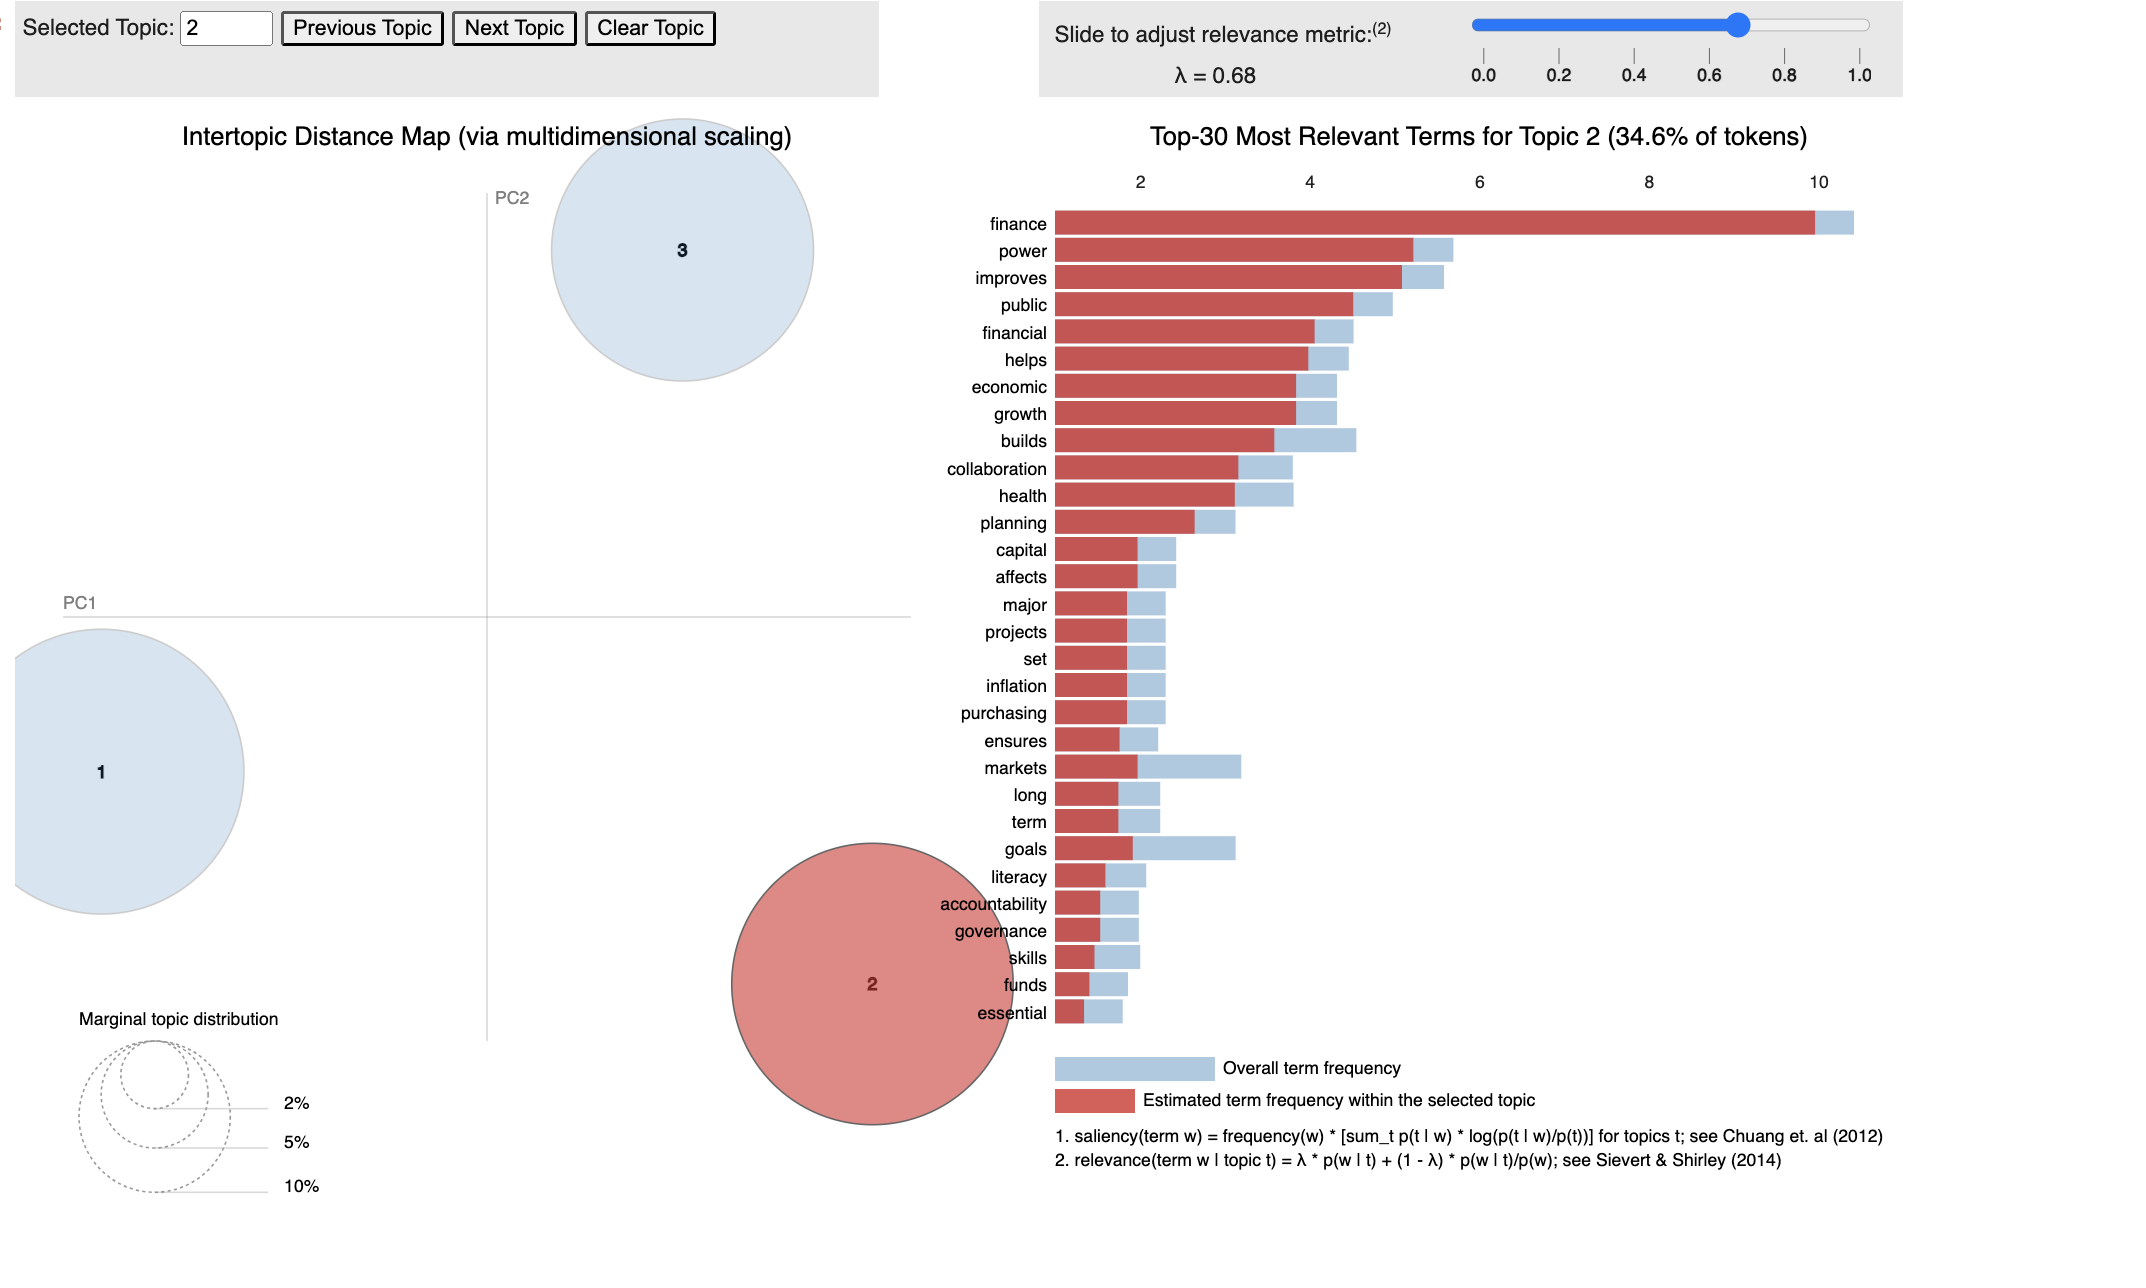

In [50]:
vis_train

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.156681 -0.035846       1        1  35.430085
2      0.111351 -0.109679       2        1  34.598566
0      0.045330  0.145525       3        1  29.971349, topic_info=                Term       Freq      Total Category  logprob  loglift
3             energy   9.000000   9.000000  Default  30.0000  30.0000
43         education  11.000000  11.000000  Default  29.0000  29.0000
22           finance   9.000000   9.000000  Default  28.0000  28.0000
45          learning   8.000000   8.000000  Default  27.0000  27.0000
9              power   5.000000   5.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
116  electrification   1.054067   1.477760   Topic3  -4.8823   0.8671
70         resources   0.991856   1.402210   Topic3  -4.9431   0.8587
233      flexibility   1.283980   1.878689   Topic3  -4.6850   0.8243
234          manages   1.283980   1.878689   Topic3  -4.6850   0.8243
235         variable   1.283980   1.878689   Topic3  -4.6850   0.8243

[128 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
54        1  0.927927          access
244       2  0.529143  accountability
253       1  0.953039     achievement
85        2  0.874682         affects
96        1  0.897334          aligns
...     ...       ...             ...
154       3  0.782678         systems
185       2  0.944786            term
259       1  0.822981           tools
247       1  0.953039          values
235       3  0.532286        variable

[105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

##### Inference

In [47]:
pyLDAvis.enable_notebook()
vis_inference = pyLDAvis.gensim.prepare(lda_model, inf_corpus, dictionary=lda_model.id2word)

In [48]:
vis_inference

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.156681  0.035846       1        1  48.810200
0      0.045330 -0.145525       2        1  47.141839
2      0.111351  0.109679       3        1   4.047960, topic_info=          Term      Freq     Total Category  logprob  loglift
3       energy  0.000000  0.000000  Default  30.0000  30.0000
43   education  0.000000  0.000000  Default  29.0000  29.0000
45    learning  0.000000  0.000000  Default  28.0000  28.0000
22     finance  0.000000  0.000000  Default  27.0000  27.0000
26      builds  0.000000  0.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
142     skills  0.001431  0.007552   Topic3  -4.7285   1.5437
20     savings  0.001222  0.006537   Topic3  -4.8862   1.5304
82   influence  0.001179  0.006402   Topic3  -4.9223   1.5151
80     markets  0.001893  0.016480   Topic3  -4.4491   1.0428
39       goals  0.001841  0.016010   Topic3  -4.4766   1.0442

[126 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

##### Output html 

- Could also be plotted in a dashboard, depending on customer preferences.

In [55]:
os.chdir(dir_viz)
pyLDAvis.save_html(vis_train, os.getcwd() +"/vis_train.html")
pyLDAvis.save_html(vis_inference, os.getcwd() +"/vis_inference.html")

## LSA

https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

In [49]:
# some implementations name 'train_dictionary' as 'id2word', but to me that's not very clear
train_data, train_corpus_data, train_corpus, train_dictionary = lda.automate_corpus_prep(train, 'train_raw')

preprocessed...
tokenized...
dictionary and corpus created


### Vectorizer / Doc Term Matrix

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [41]:
#lsa_vectorizer = TfidfVectorizer(stop_words='english', 
#                             use_idf=True, 
#                             smooth_idf=True)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(train_data.corpus_clean)

### dimensionality reduction

In [82]:
svd = TruncatedSVD(n_components=2,
                    algorithm='randomized',
                    n_iter=10)

### get LSA matrix

In [83]:
lsa = svd.fit_transform(bag_of_words)

### get labels - topic encoded

In [86]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df['sentence'] = train_data.corpus_clean
#topic_encoded_df['Is_Poe'] = (body_df.title == "The Raven")
topic_encoded_df.head()

,topic_1,topic_2,sentence
0,1.098151,-0.414449,energy efficiency reduces costs and emissions
1,1.054439,-0.217168,renewable energy supports a cleaner grid
2,1.045030,-0.440328,energy storage stabilizes power supply
3,0.977342,-0.410175,smart grids optimize energy distribution
4,0.980860,-0.412691,energy audits identify savings opportunities


#### dictionary and encoding matrix

In [ ]:
dictionary = vectorizer.get_feature_names()

In [ ]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

### Visualize w/ dimension reduction

#### UMAP

In [71]:
embedding = umap.UMAP(n_neighbors = 10, min_dist = 0.5, random_state = 0).fit_transform(lsa_matrix)

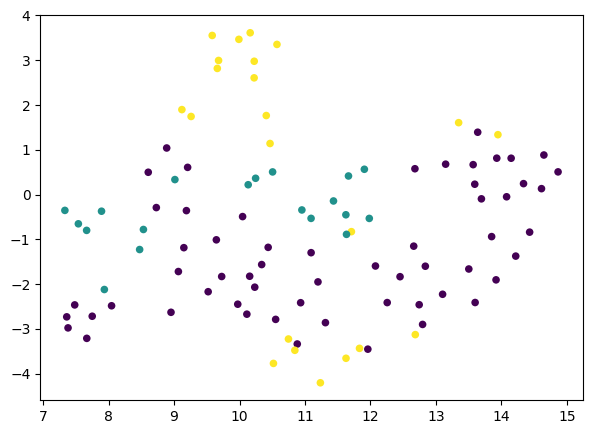

In [72]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = labels_kmeans,
            s = 30, # size
            edgecolor='none'
            )
plt.show()

#### apply to tsne

In [73]:
tsne_lsa_model = TSNE(n_components = 3, # this is predefined above
                      perplexity = 50, 
                      learning_rate = 100, 
                      n_iter = 2000, 
                      verbose = 1, 
                      random_state = 0, 
                      angle = 0.75)

In [74]:
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_matrix)

[t-SNE] Computing 98 nearest neighbors...
[t-SNE] Indexed 99 samples in 0.000s...
[t-SNE] Computed neighbors for 99 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 99 / 99
[t-SNE] Mean sigma: 0.330810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 120.208664
[t-SNE] KL divergence after 2000 iterations: 1.106400


In [ ]:
## plot




# Clustering

<u>STEPS</u>
1. **Vectorization and Embeddings**
    - TFIDF Vectorizer
    - Count Vectorizer
    - Sentence transformers 
    - other BERT-based embeddings
2. **Dimensionality Reductions**
    - PCA
    - t-SNE
    - UMAP
3. **Clustering**
    - K-means
    - DBSCAN
    - HDBSCAN
4. **Metric Evaluation**
    - Silhouette score
5. **Optimize hyperparameters - grid search**
    - Identify "best model" for each clustering technique
6. **Extract Topics**
    - c-TF-IDF
    - BERTopic
7. **Visualize Results**
    - all models: 2D scatter plot with dim reduction and colored clusters
    - all models: word cloud
    - all models: hbar for topic words by class
    - hierarchical clustering: dendrograms (condensed, single), network

TO DO:
- extract dataframe with the assigned cluster for every document

## 1. Vectorization and Embeddings

### TFIDF vectorizer

https://medium.com/@RobuRishabh/clustering-text-data-with-k-means-and-visualizing-with-t-sne-9bc1fe7d8fed

#### Large dataset

In [406]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X_vectorized_large = vectorizer.fit_transform(abstracts)

In [417]:
X_vectorized

<2000x11884 sparse matrix of type '<class 'numpy.float64'>'
	with 121088 stored elements in Compressed Sparse Row format>

#### Small dataset

In [410]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X_vectorized_small = vectorizer.fit_transform(list(train_corpus_data_small['corpus_clean']))

### Count vectorizer

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#doc_term_matrix = vectorizer.fit_transform(list(train_data['corpus_clean']))
#doc_term_matrix

### Transformer methods

- requires Torch and a python version upgrade

In [ ]:
######## another option for vectorizing/embedding
#from sentence_transformers import SentenceTransformer
#embedding_model = SentenceTransformer('dunzhang/stella_en_400M_v5', trust_remote_code=True)
#embeddings = embedding_model.encode(abstracts, show_progress_bar=True)
#embeddings.shape

In [ ]:
##### old - small dataset
os.chdir(dir_data)
train = pd.read_excel('lda_train_data.xlsx').drop(columns = 'Unnamed: 0')

corpus_list = list(train['train_raw'])
len(corpus_list)

# some implementations name 'train_dictionary' as 'id2word', but to me that's not very clear
train_data, train_corpus_data, train_corpus, train_dictionary = lda.automate_corpus_prep(train, 'train_raw')

vectorizer = TfidfVectorizer(stop_words = 'english')
X_vectorized = vectorizer.fit_transform(list(train_data['corpus_clean']))

X_vectorized.shape
# represents each document as a vector # should be 99

## 2. Dimensionality Reduction

### PCA (not implemented)

### t-SNE

In [404]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#### Large dataset

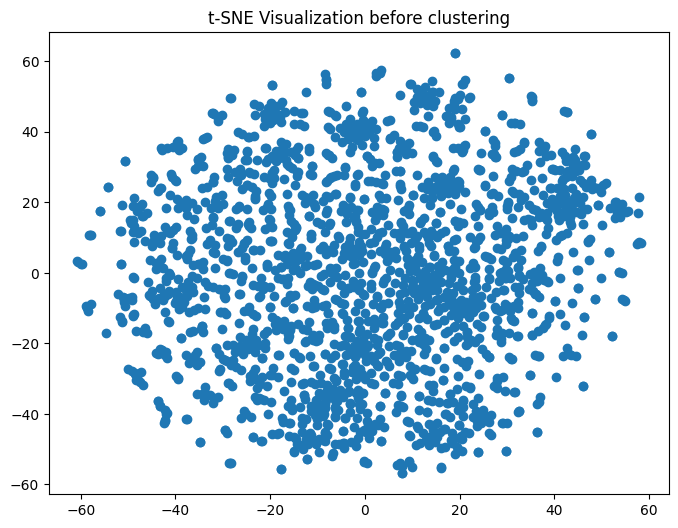

In [407]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne_large = tsne.fit_transform(X_vectorized_large.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_large[:, 0], X_tsne_large[:, 1], #c=labels, 
            cmap='viridis', marker='o')
plt.title('t-SNE Visualization before clustering')
plt.show()

#### Small dataset

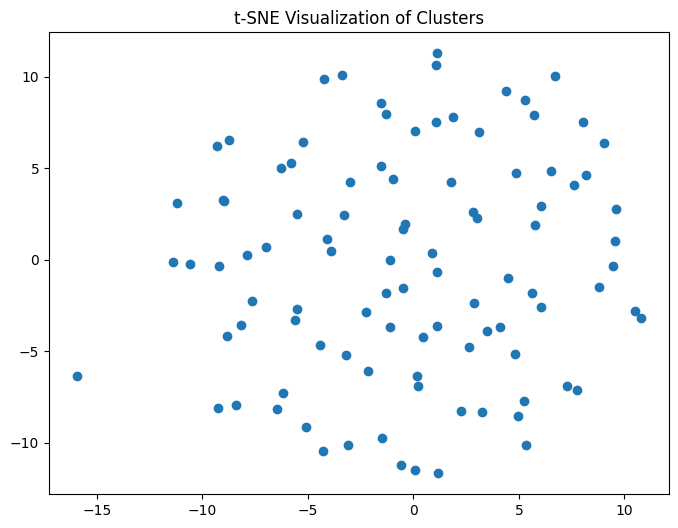

In [411]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne_small = tsne.fit_transform(X_vectorized_small.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_small[:, 0], X_tsne_small[:, 1], #c=labels, 
            cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters')
plt.show()

### UMAP

#### Large dataset

In [ ]:
# Optimize: n_components, min_dist

In [419]:
# hyperparam option 1
umap_model = umap.UMAP(
    n_components=10, # Reduces dimensionality while preserving essential structure
    min_dist=0.0, # Controls how tightly points cluster together
    metric='cosine', # Measures similarity between embeddings using cosine distance 
    random_state=42
)

# These parameters were chosen to optimize cluster separation while maintaining semantic relationships.
reduced_embeds_umap = umap_model.fit_transform(X_vectorized_large)

In [452]:
reduced_embeds_umap.shape

(2000, 10)

In [418]:
# hyperparam option 2
reduced_embeds_umap_2 = umap.UMAP(n_components = 2, min_dist = 0.0, metric = 'cosine', random_state = 42).fit_transform(X_vectorized_large)

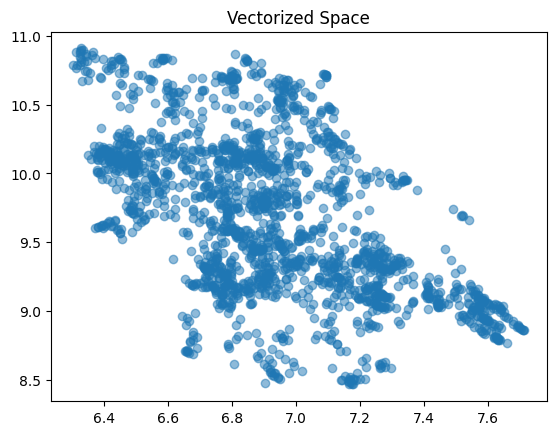

In [422]:
plt.scatter(reduced_embeds_umap[:, 0], reduced_embeds_umap[:,1], alpha = 0.5)
plt.title("Vectorized Space")
plt.show()

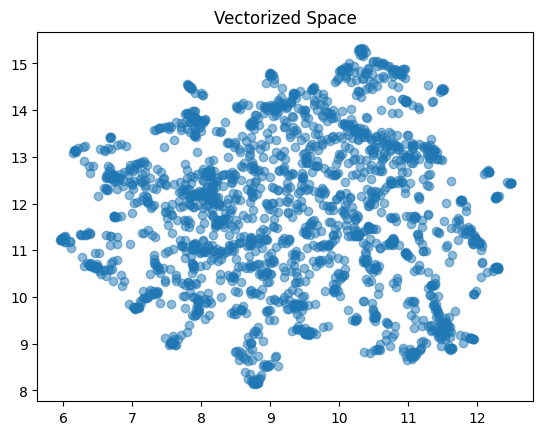

In [421]:
plt.scatter(reduced_embeds_umap_2[:, 0], reduced_embeds_umap_2[:,1], alpha = 0.5)
plt.title("Vectorized Space")
plt.show()

#### Small dataset

In [415]:
X_UMAP_small = umap.UMAP(n_components = 2, min_dist = 0.0, metric = 'cosine', random_state = 42).fit_transform(X_vectorized_small)

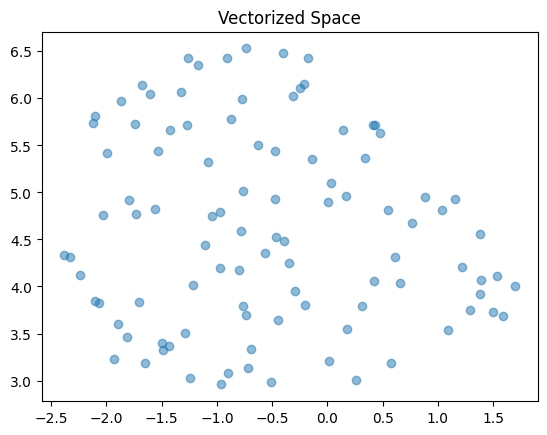

In [416]:
plt.scatter(X_UMAP_small[:, 0], X_UMAP_small[:,1], alpha = 0.5)
plt.title("Vectorized Space")
plt.show()

## 3. Clustering

In [ ]:
X_vectorized_large
reduced_embeds_umap

#### K-means

##### Large dataset

In [456]:
from sklearn.cluster import KMeans

# Number of clusters (choose based on your dataset)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_embeds_umap)

# Output the cluster labels for each document
clusters_kmeans = kmeans.labels_ #### same as fit_predict
print("Cluster Labels:", clusters_kmeans)
len(clusters_kmeans)

Cluster Labels: [2 2 0 ... 2 1 0]


2000

In [464]:
res = kmeans.fit_predict(reduced_embeds_umap)
res

array([2, 2, 0, ..., 2, 1, 0], dtype=int32)

##### Small dataset

In [26]:
from sklearn.cluster import KMeans

# Number of clusters (choose based on your dataset)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_vectorized)

# Output the cluster labels for each document
labels_kmeans = kmeans.labels_
print("Cluster Labels:", labels_kmeans)

Cluster Labels: [0 0 0 0 0 2 2 0 0 0 1 1 1 1 0 0 0 0 2 2 2 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 0
 0 0 0 2 1 1 0 2 0 2 1 1 1 0 0 0 0 2 0 0 2 2 1 2 0 0 0 0 0 0 0 0 2 2 0 0 2
 1 2 1 0 0 0 0 0 0 0 2 2 2 0 0 1 1 1 1 0 0 0 2 1 0]


#### DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
labels_dbscan = dbscan.fit_predict(X_vectorized)

#### HDBSCAN 

Useful resources:

    - https://arize.com/blog-course/understanding-hdbscan-a-deep-dive-into-hierarchical-density-based-clustering/
    - https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
    - https://vizuara.substack.com/p/from-text-to-insights-hands-on-text
    
    - https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

In [426]:
from hdbscan import HDBSCAN

def run_HDBSCAN(reduced_embeds, alpha = 1.0, min_cluster_size=50): ### add params

    # We fit the model and extract the clusters
    hdbscan_model = HDBSCAN(algorithm = 'best',
                            alpha = alpha,

                            #min_samples = 5,
                            min_cluster_size=min_cluster_size, # Ensures statistically significant groupings
                            #leaf_size = 30,
                            metric='euclidean', # Measures distance in reduced space
                            cluster_selection_method='eom', # Optimizes cluster boundary detection
                            gen_min_span_tree=True
    ).fit(reduced_embeds)
    clusters = hdbscan_model.labels_
    
    print(f"Model identified {len(set(clusters))} clusters")
    
    return(hdbscan_model, clusters)

In [427]:
model_hdbscan, clusters_hdbscan = run_HDBSCAN(reduced_embeds_umap, alpha = 1.0, min_cluster_size=50)

Model identified 8 clusters


In [449]:
len(reduced_embeds_umap)

2000

## 4. Metric Evaluation

In [428]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

def eval_clusters_silhouette(model, reduced_embeds):
    
    # Evaluate clustering
    labels = model.labels_
    silhouette_avg = silhouette_score(reduced_embeds, labels)

    # Evaluation metrics
    print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))

In [429]:
eval_clusters_silhouette(model_hdbscan, reduced_embeds_umap)

Silhouette Coefficient: 0.14


## 5. Optimization - grid search on hyperparameters

## 6. Extract Topics

### c-TF-IDF

https://www.pinecone.io/learn/bertopic/

#### Functions

In [431]:
def preprocess_cTFIDF(corpus_list):
    
    df = pd.DataFrame(corpus_list, columns = ['raw'])
    df['raw'] = df['raw'].astype(str)

    # make lowercase and remove punctuation
    ischar = re.compile(r'[^a-zA-Z ]+')
    df['tokens'] = df['raw'].apply(lambda x: re.sub(r'[^a-zA-Z ]+', ' ', str(x)).lower())

    # tokenize, separating by whitespace
    df['tokens'] = df['tokens'].apply(lambda x: nltk.tokenize.wordpunct_tokenize(x))                                 

    # remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # stopwords from nltk are all lowercase (so are our tokens)
    df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords])         
    
    return(df)

In [432]:
# calculate term frequency
def compute_term_freq(classes_dict, all_vocab):

    term_freq = np.zeros((len(classes_dict.keys()), len(all_vocab)))
    print("Shape of term_freq array:", term_freq.shape)

    print('='*80, '\nCalculating term frequency\n', '='*80)

    for freq_ind, class_ind in enumerate(classes_dict.keys()):

        #if (class_ind == -1): continue

        vocab_list = classes_dict[class_ind]
        print(f'\tCalculating term frequency for class {class_ind}')

        for term_ind, term in enumerate(tqdm.tqdm(all_vocab)):

            term_freq[freq_ind, term_ind] = classes_dict[class_ind]['tokens'].count(term)
            
    return(term_freq)

In [433]:
# calculate inverse document frequency
def compute_inverse_doc_freq(term_freq, all_vocab):

    inverse_doc = np.zeros((1, len(all_vocab)))
    inverse_doc.shape

    print('='*80, '\nCalculating inverse document frequency\n', '='*80)

    # get avg number of words for each class
    avg = term_freq.sum() / term_freq.shape[0]

    for term_ind, term in enumerate(tqdm.tqdm(all_vocab)):

        # term frequency in all classes
        freq_this_term = term_freq[:,term_ind].sum()

        # inverse doc frequency
        idf_score = np.log(1 + (avg / freq_this_term))

        inverse_doc[0, term_ind] = idf_score

    return(inverse_doc)

In [458]:
# calculate tf-idf and c-TF-IDF
def compute_cTFIDF(corpus_list, clusters, n_top_words = 5):
    
    # preprocessing
    print(f"Preprocessing\n")
    df = preprocess_cTFIDF(corpus_list)
    df['class'] = clusters
    #len(clusters)

    # assign classes dictionary and get vocab list
    classes_dict = {label: {'tokens': []} for label in set(clusters)}
    for index, row in df.iterrows(): # 
        classes_dict[row['class']]['tokens'].extend(row['tokens'])
    
    all_vocab = []
    for __, values in classes_dict.items():
        all_vocab.extend(values['tokens'])
    all_vocab = list(set(all_vocab))
    print(f"Number of unique words in vocab: {len(all_vocab)}\n")
    
    # compute term frequency
    term_freq = compute_term_freq(classes_dict, all_vocab)
    
    # compute inverse document frequency
    inverse_doc = compute_inverse_doc_freq(term_freq, all_vocab)

    #tf_idf
    tf_idf = term_freq * inverse_doc

        # get the indices for the n_top_words in each class
    top_index = np.argpartition(tf_idf, -n_top_words)[:, -n_top_words:]

    # c-TF-IDF
    possible_topics = {}
    for freq_ind, class_ind in enumerate(classes_dict.keys()):
        topn_index = top_index[freq_ind, :]
        topn_terms = [all_vocab[idx] for idx in topn_index]

        possible_topics[class_ind] = topn_terms

        print(f'{class_ind}:', topn_terms)
        
    return(possible_topics)

#### Run on multiple models

In [459]:
possible_topics_kmeans = compute_cTFIDF(corpus_list = abstracts, clusters = clusters_kmeans, n_top_words = 10)

Preprocessing

Number of unique words in vocab: 11556

Shape of term_freq array: (3, 11556)
Calculating term frequency
	Calculating term frequency for class 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:07<00:00, 1524.82it/s]


	Calculating term frequency for class 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:14<00:00, 823.81it/s]


	Calculating term frequency for class 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:07<00:00, 1483.89it/s]


Calculating inverse document frequency


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:00<00:00, 242616.19it/s]

0: ['data', 'paper', 'analysis', 'words', 'language', 'word', 'text', 'using', 'based', 'sentiment']
1: ['approach', 'representations', 'paper', 'based', 'text', 'words', 'word', 'language', 'semantic', 'model']
2: ['paper', 'system', 'machine', 'models', 'model', 'based', 'translation', 'language', 'speech', 'neural']


In [ ]:
# run on DBSCAN

In [454]:
#### these topics are relatively coherent -> but we need to optimize hyperparameters because of a relatively low silhouette score of 0.14
possible_topics_HDBSCAN = compute_cTFIDF(corpus_list = abstracts, clusters = clusters_hdbscan, n_top_words = 10)

Preprocessing

Number of unique words in vocab: 11556

Shape of term_freq array: (8, 11556)
Calculating term frequency
	Calculating term frequency for class 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:00<00:00, 20614.18it/s]


	Calculating term frequency for class 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:01<00:00, 6456.51it/s]


	Calculating term frequency for class 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:01<00:00, 11381.69it/s]


	Calculating term frequency for class 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:03<00:00, 3701.38it/s]


	Calculating term frequency for class 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:00<00:00, 22533.70it/s]


	Calculating term frequency for class 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:01<00:00, 11044.43it/s]


	Calculating term frequency for class 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:02<00:00, 4375.25it/s]


	Calculating term frequency for class -1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:14<00:00, 782.94it/s]


Calculating inverse document frequency


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11556/11556 [00:00<00:00, 224798.03it/s]

0: ['expressions', 'present', 'extraction', 'coreference', 'frames', 'information', 'events', 'temporal', 'system', 'event']
1: ['users', 'opinions', 'tweets', 'twitter', 'reviews', 'polarity', 'sentiment', 'opinion', 'social', 'analysis']
2: ['zipf', 'law', 'language', 'length', 'languages', 'networks', 'frequency', 'texts', 'word', 'words']
3: ['vectors', 'word', 'models', 'embeddings', 'vector', 'representations', 'words', 'semantic', 'model', 'learning']
4: ['parse', 'transition', 'structured', 'based', 'trees', 'dependency', 'parser', 'tree', 'parsing', 'amr']
5: ['based', 'features', 'using', 'acoustic', 'recognition', 'performance', 'speech', 'speaker', 'system', 'dnn']
6: ['network', 'english', 'lstm', 'language', 'model', 'models', 'translation', 'machine', 'neural', 'based']
-1: ['approach', 'using', 'words', 'data', 'based', 'language', 'paper', 'text', 'model', 'word']


#### **Map to data**

In [468]:
possible_topics_HDBSCAN

{0: ['expressions',
  'present',
  'extraction',
  'coreference',
  'frames',
  'information',
  'events',
  'temporal',
  'system',
  'event'],
 1: ['users',
  'opinions',
  'tweets',
  'twitter',
  'reviews',
  'polarity',
  'sentiment',
  'opinion',
  'social',
  'analysis'],
 2: ['zipf',
  'law',
  'language',
  'length',
  'languages',
  'networks',
  'frequency',
  'texts',
  'word',
  'words'],
 3: ['vectors',
  'word',
  'models',
  'embeddings',
  'vector',
  'representations',
  'words',
  'semantic',
  'model',
  'learning'],
 4: ['parse',
  'transition',
  'structured',
  'based',
  'trees',
  'dependency',
  'parser',
  'tree',
  'parsing',
  'amr'],
 5: ['based',
  'features',
  'using',
  'acoustic',
  'recognition',
  'performance',
  'speech',
  'speaker',
  'system',
  'dnn'],
 6: ['network',
  'english',
  'lstm',
  'language',
  'model',
  'models',
  'translation',
  'machine',
  'neural',
  'based'],
 -1: ['approach',
  'using',
  'words',
  'data',
  'based',
  '

In [466]:
print(len(clusters_hdbscan))

2000


In [470]:
mapped_df = pd.DataFrame(zip(abstracts, clusters_hdbscan), columns= ['documents', 'clusters'])
mapped_df

mapped_df['top_words'] = ''

for ind, n_top in possible_topics_HDBSCAN.items():
    
    n_top_str = '|'.join(n_top[:5])
    mapped_df.loc[(mapped_df['clusters'] == ind), ['top_words']] = n_top_str

In [471]:
mapped_df

,documents,clusters,top_words
0,In this paper Arabic was investigated from t...,5,based|features|using|acoustic|recognition
1,In this paper we present the creation of an ...,5,based|features|using|acoustic|recognition
2,Intelligent Input Methods (IM) are essential...,-1,approach|using|words|data|based
3,This paper includes a reflection on the role...,-1,approach|using|words|data|based
4,"We test a segmentation algorithm, based on t...",-1,approach|using|words|data|based
...,...,...,...
1995,Due to the lack of structured knowledge appl...,-1,approach|using|words|data|based
1996,Do word embeddings converge to learn similar...,3,vectors|word|models|embeddings|vector
1997,We propose a novel framework for the analysi...,-1,approach|using|words|data|based
1998,The categorical compositional distributional...,3,vectors|word|models|embeddings|vector


### BERTopic

## 7. Visualize Results

### HDBSCAN

#### Functions

In [473]:
def save_hdbscan_plots(model, folder, palette = 'PRGn', reduced_embeddings = reduced_embeddings, 
                      reduction_method = 'umap', clusters = clusters): # color blind friendly palette
    
    os.chdir(folder)
    
    # spanning tree - network
    model.minimum_spanning_tree_.plot(edge_cmap=palette,
                                          edge_alpha=0.7,
                                          node_size=50,
                                          edge_linewidth=1)
    plt.savefig('hdbscan_mst.png', dpi=500)
    plt.close()

    # save the Single Linkage Tree (Dendrogram)
    model.single_linkage_tree_.plot(cmap=palette, colorbar=True)
    plt.savefig('hdbscan_dendro_single.png', dpi=300)
    plt.close()

    # save the Condensed Linkage Tree (Dendrogram)
    model.condensed_tree_.plot(cmap=palette, colorbar=True, select_clusters=True, )
    plt.savefig('hdbscan_dendro_condensed.png', dpi=300)
    plt.close()
    
    # save the scatter plot of reduced embeddings plus clusters - for this method of dim reduction
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap=palette, marker='o', linewidth = 0.3,  edgecolor = 'black')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(f'hdbscan_scatter_2d_{reduction_method}.png', dpi=500)
    plt.close()
    
    #print('output files to: ', folder)
    print('output files')

In [437]:
from PIL import Image

def import_hdbscan_plots(folder):
    
    #### add exception handling for if each exists
    
    os.chdir(folder)
    
    # mst
    image = Image.open(os.getcwd() + '/hdbscan_mst.png')
    im_array_mst = np.array(image)
    
    # single linkage tree
    image = Image.open(os.getcwd() + '/hdbscan_dendro_single.png')
    im_array_dendro_sing = np.array(image)
    
    # condensed tree
    image = Image.open(os.getcwd() + '/hdbscan_dendro_condensed.png')
    im_array_dendro_cond = np.array(image)
    
    # dimension-reduced scatter plot of condensed tree
    image = Image.open(os.getcwd() + '/hdbscan_scatter_2d_umap.png')
    im_array_scatter_2d_umap = np.array(image)

    return(im_array_mst, im_array_dendro_sing, im_array_dendro_cond, im_array_scatter_2d_umap)

In [438]:
def display_hier_results(clustering_method, dim_method, silhouette, clusters, 
                         im_array_mst, im_array_dendro_sing, im_array_dendro_cond, im_array_scatter_2d_umap):
    
    print(f"Visual Results for: \n\tClustering Method = {clustering_method}\n\tDimension Reduction Method = {dim_method}")
    n_clusters = len(set(clusters))
    print("Number of clusters:", n_clusters)
    print(f"Silhouette Score: {silhouette}\n")
    
    fig, axs = plt.subplots(2, 2, figsize = (25, 12))
    
    # dim reduced 2d scatter
    axs[0, 0].set_xlim(100, 1650)
    axs[0, 0].set_ylim(130, 1250)
    axs[0, 0].imshow(im_array_scatter_2d_umap, aspect = 'auto', #origin = 'lower',
                extent = [0, 1800, 0, 1400])
    axs[0, 0].axis('off')
    axs[0, 0].set_title(f'{dim_method}-Reduced Clusters ({n_clusters})', size = 18)

    # im_array_dendro_condensed
    axs[0, 1].set_xlim(100, 1650)
    axs[0, 1].set_ylim(130, 1250)
    axs[0, 1].imshow(im_array_dendro_cond, aspect = 'auto', #origin = 'lower',
                extent = [0, 1800, 0, 1400])
    axs[0, 1].axis('off')
    axs[0, 1].set_title(f'Dendrogram - Condensed', size = 18)
    
    # im_array_mst
    axs[1, 0].set_xlim(100, 1650)
    axs[1, 0].set_ylim(130, 1250)
    axs[1, 0].imshow(im_array_mst, aspect = 'auto', #origin = 'lower',
                extent = [0, 1800, 0, 1400])
    axs[1, 0].axis('off')
    axs[1, 0].set_title(f'Minimum Spanning Tree', size = 18)
    
    # im_array_dendro_sing
    axs[1, 1].set_xlim(100, 1650)
    axs[1, 1].set_ylim(130, 1250)
    axs[1, 1].imshow(im_array_dendro_sing, aspect = 'auto', #origin = 'lower',
                extent = [0, 1800, 0, 1400])
    axs[1, 1].axis('off')
    axs[1, 1].set_title(f'Dendrogram - Single', size = 18)

#### Run

In [474]:
save_hdbscan_plots(hdbscan_model, dir_data, palette = 'PRGn');

output files


In [441]:
im_array_mst, im_array_dendro_sing, im_array_dendro_cond, im_array_scatter_2d_umap = import_hdbscan_plots(dir_data)

Visual Results for: 
	Clustering Method = HDBSCAN
	Dimension Reduction Method = UMAP
Number of clusters: 8
Silhouette Score: 0.14153705537319183



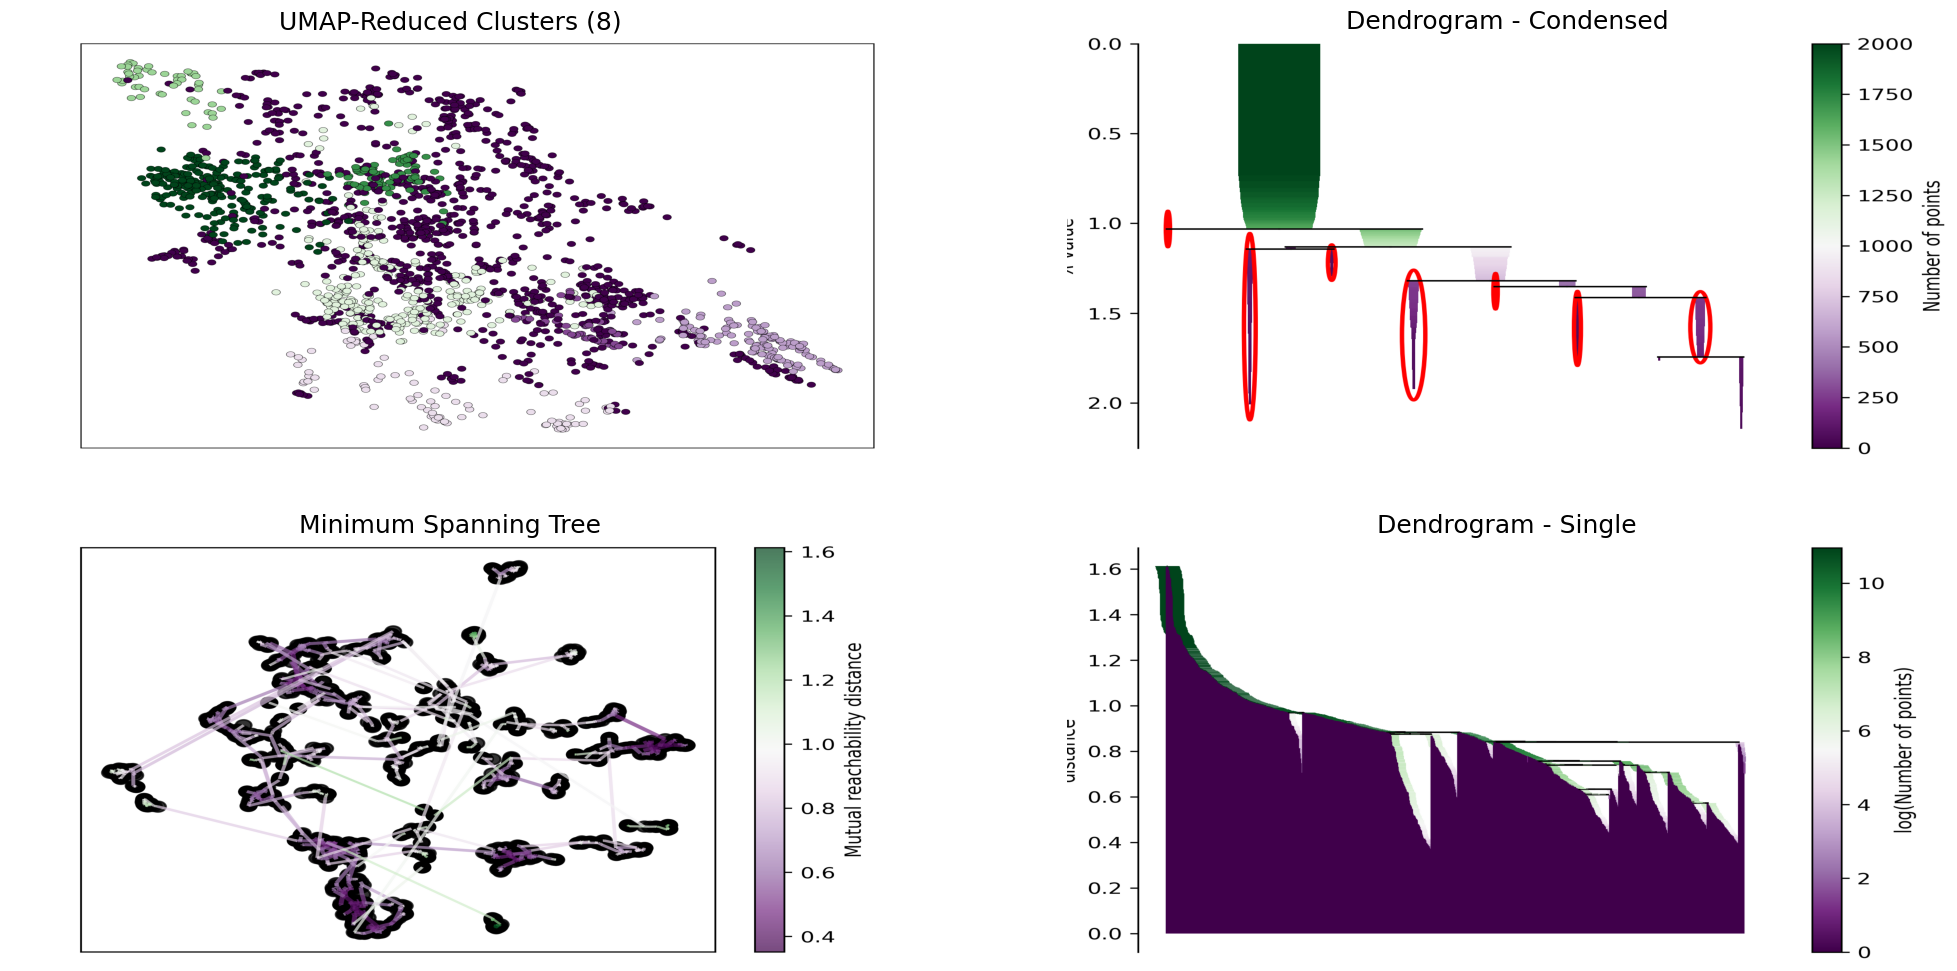

In [442]:
display_hier_results('HDBSCAN', 'UMAP', silhouette_avg, clusters, 
                    im_array_mst, im_array_dendro_sing, im_array_dendro_cond, im_array_scatter_2d_umap)

### DBSCAN

### K-means

- find optimal k

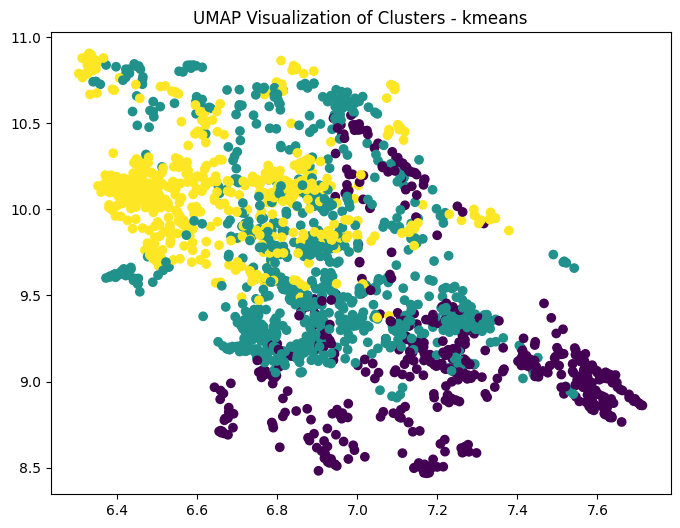

In [460]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeds_umap[:, 0], reduced_embeds_umap[:, 1], c=clusters_kmeans, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - kmeans')
plt.show()

## Move somewhere

In [141]:
hdbscan_model.condensed_tree_.to_pandas()#.head()

,parent,child,lambda_val,child_size
0,2000,1599,0.620139,1
1,2000,1927,0.621099,1
2,2000,1500,0.621137,1
3,2000,550,0.624148,1
4,2000,1449,0.625990,1
...,...,...,...,...
2009,2007,1291,1.923088,1
2010,2007,1570,1.923088,1
2011,2007,1982,1.923088,1
2012,2007,476,1.923088,1


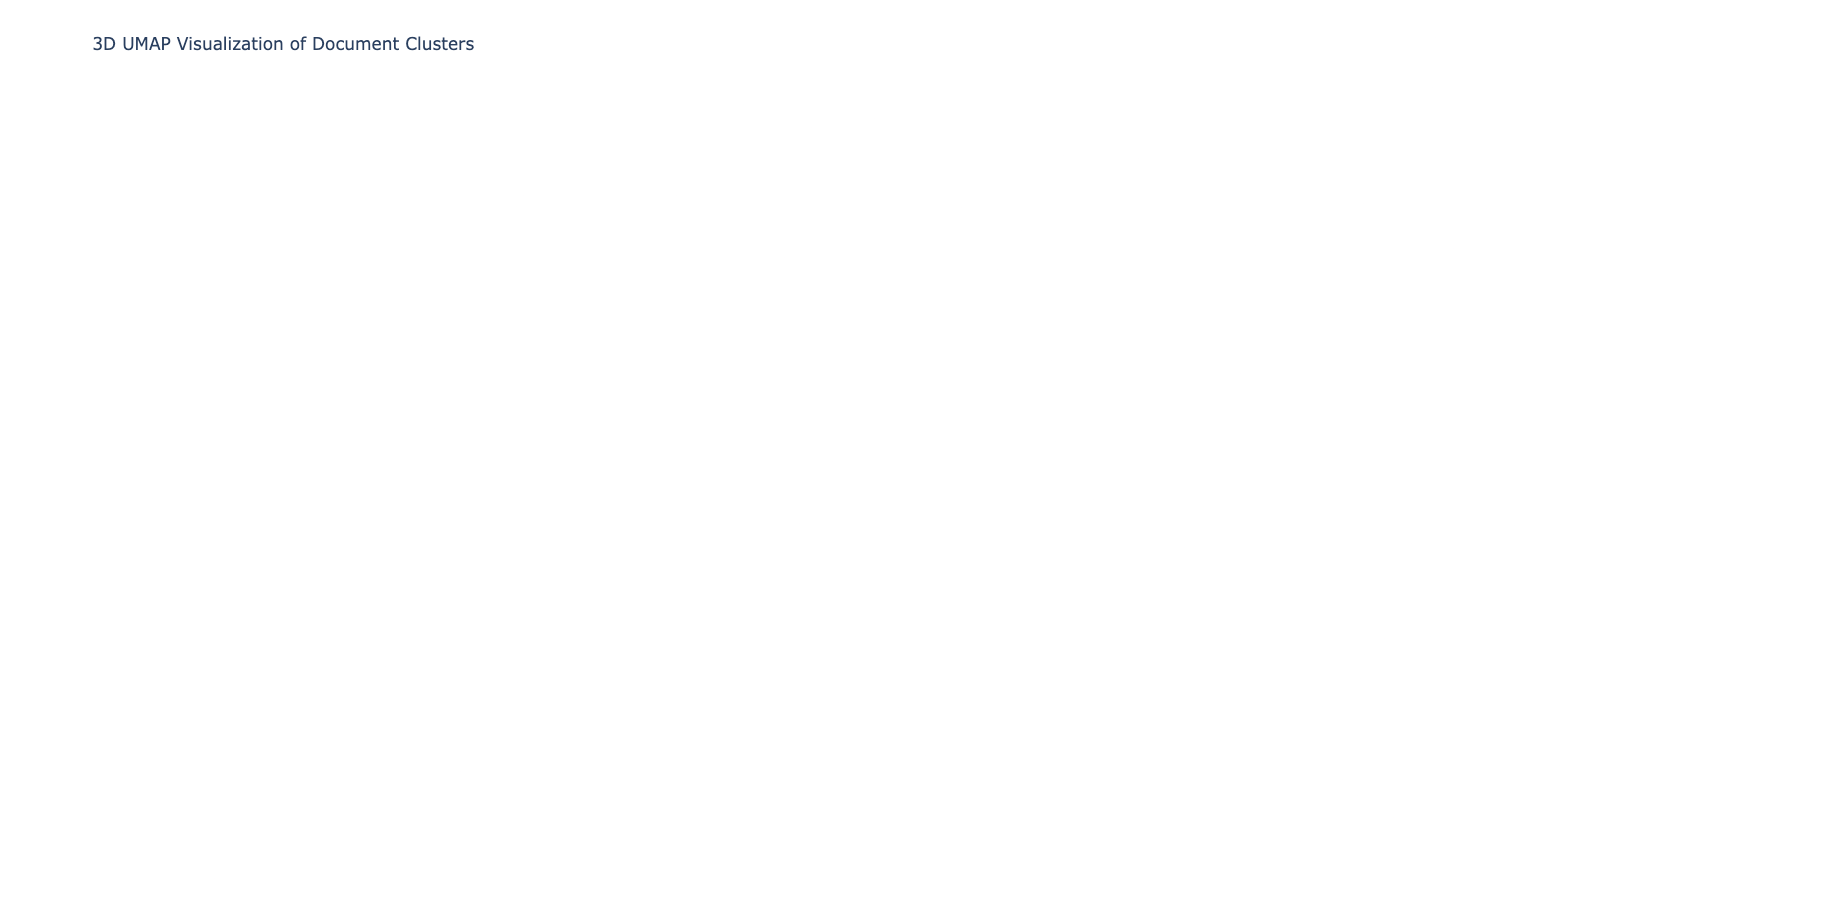

In [48]:
import pandas as pd
import plotly.express as px
from umap import UMAP

# Reduce 384-dimensional embeddings to 3 dimensions
reduced_embeddings_3d = UMAP(
   n_components=3,
   min_dist=0.0,
   metric='cosine',
   random_state=42
).fit_transform(X_vectorized)
#).fit_transform(embeddings)

# Create dataframe with 3D coordinates
df_3d = pd.DataFrame(
   reduced_embeddings_3d,
   columns=["x", "y", "z"]
)
df_3d["title"] = titles
df_3d["cluster"] = [str(c) for c in clusters]
#df_3d["size"] = 10000

# Create 3D scatter plot 
fig = px.scatter_3d(
                    df_3d,
                    x='x',
                    y='y',
                    z='z',
                    color='cluster',
                    title='3D UMAP Visualization of Document Clusters',
                    opacity=0.7,
                    color_continuous_scale='viridis',
                    size_max=0.2,
                    #size = 'size',
                    hover_data=['title']  # Show title on hover
)

# Update layout
fig.update_layout(
   width=700,
   height=900,
   showlegend=True
)

fig.show()

fig.write_html('test_fig.html')

In [44]:
fig.data#[0].x

(Scatter3d({
     'customdata': array([['Introduction to Arabic Speech Recognition Using CMUSphinx System'],
                          ['Arabic Speech Recognition System using CMU-Sphinx4'],
                          ['Speech Recognition Oriented Vowel Classification Using Temporal Radial\n  Basis Functions'],
                          ['Syllable Analysis to Build a Dictation System in Telugu language'],
                          ['Speech Recognition by Machine, A Review'],
                          ['Approximations to the MMI criterion and their effect on lattice-based\n  MMI'],
                          ['Why has (reasonably accurate) Automatic Speech Recognition been so hard\n  to achieve?'],
                          ['Emotional State Categorization from Speech: Machine vs. Human'],
                          ['Recognizing Uncertainty in Speech'],
                          ['Performance Evaluation of Statistical Approaches for Text Independent\n  Speaker Recognition Using Source Fea

In [ ]:
################ using my dataset of 99 entries - way too small

In [26]:
umap_model = umap.UMAP(
    n_components=10, # Reduces dimensionality while preserving essential structure
    min_dist=0.0, # Controls how tightly points cluster together
    metric='cosine', # Measures similarity between embeddings using cosine distance 
    random_state=42
)

# These parameters were chosen to optimize cluster separation while maintaining semantic relationships.
reduced_embeddings = umap_model.fit_transform(X_vectorized)

In [27]:
reduced_embeddings

array([[ 1.08392372e+01,  1.17210379e+01,  7.07867193e+00,
         1.09612675e+01,  1.19853325e+01,  6.68411922e+00,
        -4.11974859e+00,  4.32516384e+00,  4.95569801e+00,
        -7.59996057e-01],
       [ 1.04018564e+01,  1.20269852e+01,  7.40239763e+00,
         1.08692255e+01,  1.19127331e+01,  7.02729130e+00,
        -3.83515811e+00,  3.67681789e+00,  4.41248703e+00,
        -8.00635695e-01],
       [ 1.05228539e+01,  1.20211105e+01,  7.67458820e+00,
         1.07336922e+01,  1.18440065e+01,  6.43798637e+00,
        -4.08877754e+00,  4.13125753e+00,  4.56398821e+00,
        -9.43847239e-01],
       [ 1.05585775e+01,  1.20316916e+01,  7.26919794e+00,
         1.09395142e+01,  1.20792484e+01,  6.88683653e+00,
        -4.09402609e+00,  4.25224686e+00,  4.79628754e+00,
        -8.06366026e-01],
       [ 1.07029972e+01,  1.24324017e+01,  7.08816624e+00,
         1.10081444e+01,  1.22199411e+01,  6.94836950e+00,
        -3.98802400e+00,  4.30121660e+00,  4.82345200e+00,
        -9.

In [29]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, # Ensures statistically significant groupings
    metric='euclidean', # Measures distance in reduced space
    cluster_selection_method='eom' # Optimizes cluster boundary detection
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_

In [30]:
len(set(clusters))

1

In [35]:
# Print first three documents in cluster 0
cluster = 2 
for index in np.where(clusters==cluster)[0][:3]:
    print(abstracts[index][:300] + "... \n")

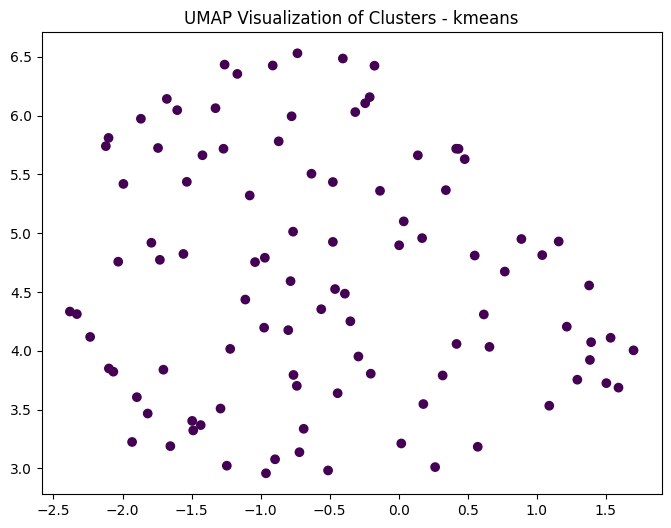

In [36]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - kmeans')
plt.show()

###### Other options - not as useful for my text data

In [134]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size = 10, min_samples = 5)

In [117]:
# https://arize.com/blog-course/understanding-hdbscan-a-deep-dive-into-hierarchical-density-based-clustering/
hdbscan_model.fit(X_vectorized)
labels_hdbscan1 = hdbscan_model.labels_
n_clusters_hdbscan = len(set(labels_hdbscan1)) - (1 if -1 in labels_hdbscan1 else 0)

In [135]:
# https://ujangriswanto08.medium.com/step-by-step-implementation-of-hdbscan-in-python-or-r-94350202c7c1
labels_hdbscan = hdbscan_model.fit_predict(X_vectorized)
labels_hdbscan

array([ 1,  1,  1,  1,  1,  1,  1,  2, -1,  1,  1,  1,  2,  1,  2,  1,  1,
        1,  1,  1,  1, -1,  2,  1,  2,  1, -1,  1,  2,  1,  1,  1,  2,  2,
        1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,
        0,  1,  0, -1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [128]:
X_UMAP.shape

(99, 2)

In [129]:
labels_hdbscan.shape

(99,)

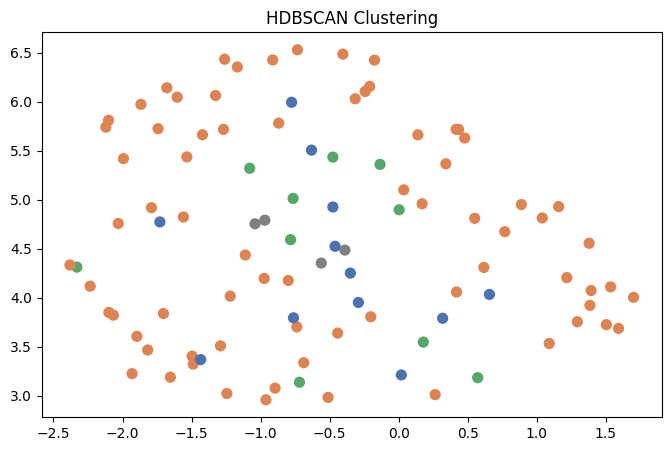

In [136]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette('deep', np.unique(labels_hdbscan).max() + 1)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels_hdbscan]

plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=colors, s=50)
plt.title("HDBSCAN Clustering")
plt.show()

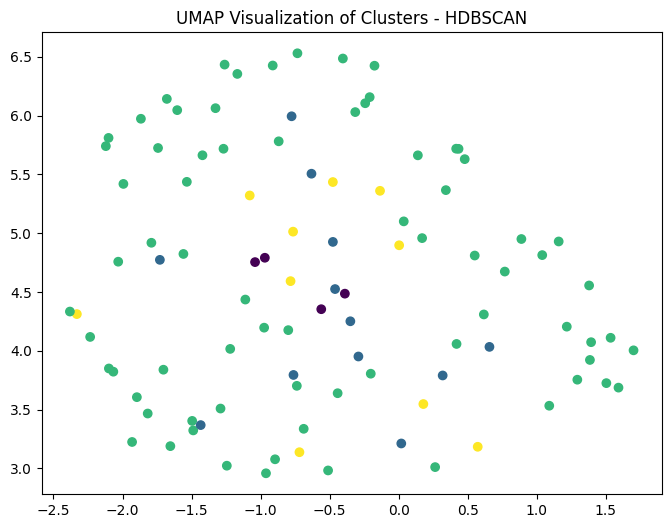

In [138]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=labels_hdbscan, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - HDBSCAN')
plt.show()

##### BERTopic

abstracted away

### 4. Visualize labels with each dimension reduction technique

- create subplots before the loop then add a trace for each row, col (index) - reduction x clustering model combinations

#### t-SNE

https://medium.com/data-science/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02

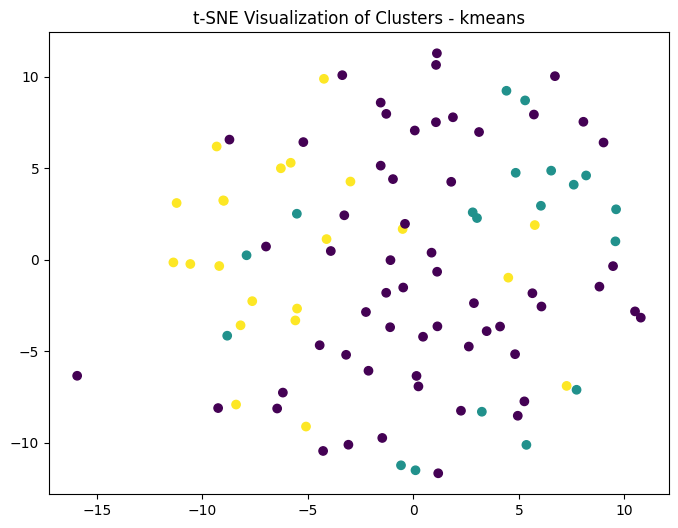

In [34]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_vectorized.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters - kmeans')
plt.show()

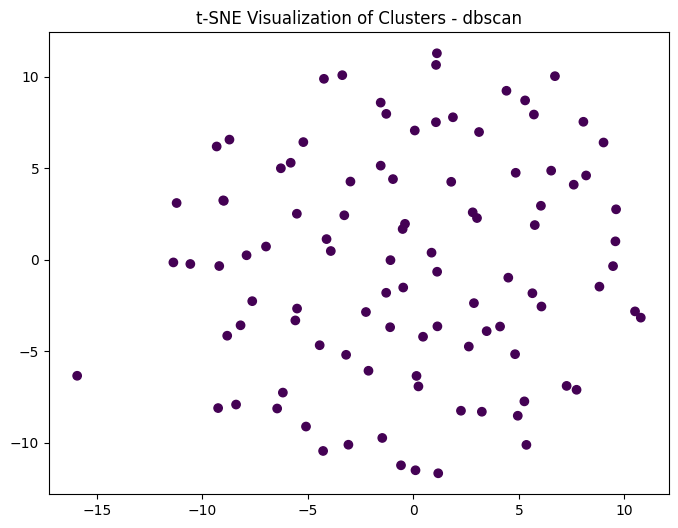

In [37]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_vectorized.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters - dbscan')
plt.show()

#### UMAP

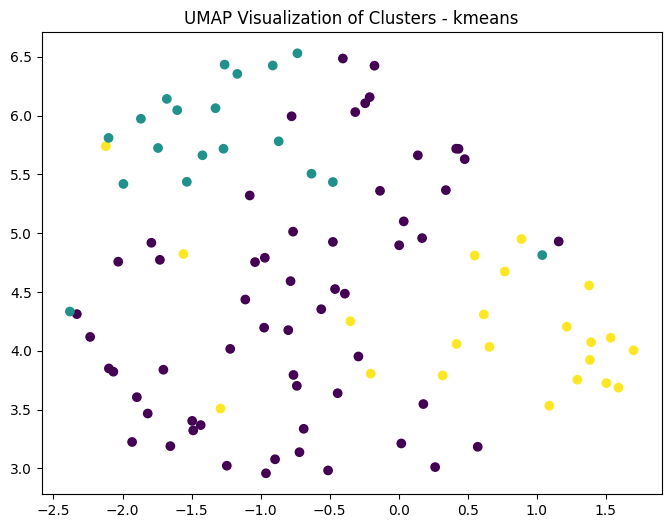

In [38]:
#### not too bad - I think there is not enough data / dimensions to use DBSCAN below
#### UMAP clearly better distinguishes the 

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - kmeans')
plt.show()

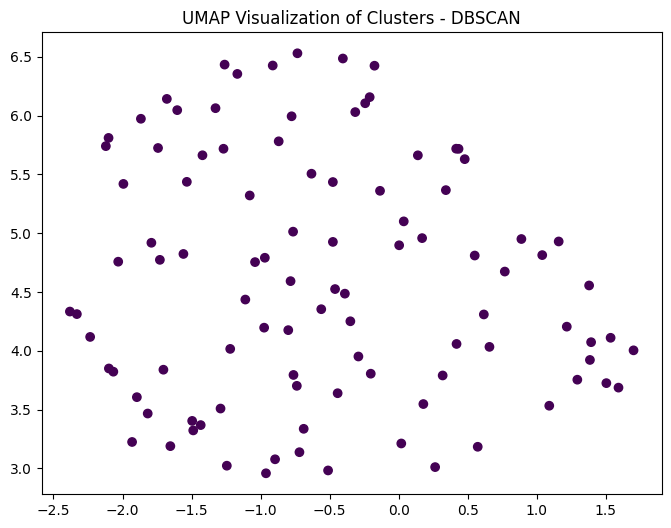

In [39]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - DBSCAN')
plt.show()

# 